# Import Required Libraries

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn import datasets


from sklearn import tree #Decision tree--eager learner
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.neighbors import KNeighborsClassifier #lazy learner
from sklearn.naive_bayes import GaussianNB #probabilistic
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model #for regression


from sklearn.metrics import confusion_matrix, classification_report #evaluation 
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split #training and testing

from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


# Define utility functions

In [2]:
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap='prism')
    for i in range(cmatrix.shape[0]):
        for j in range(cmatrix.shape[1]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [3]:
def plotSilhouette(data,k):
        model = SilhouetteVisualizer(KMeans(n_clusters=k),colors='yellowbrick')
        model.fit(data)
        model.show()

In [4]:
def plotElbow(data,metric):
    model=KMeans()
    visualizer=KElbowVisualizer(model, k=(2,15), metric=metric, timings=False)
    visualizer.fit(data)
    visualizer.show()

# Load the dataset from file and perform initial preparation.

In [5]:
#Load Iris dataset from datasets
irisData=pd.read_csv("iris_dataset.csv")

In [6]:
irisData.shape

(150, 5)

In [7]:
irisData.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
species=irisData['class']
species[:20]

0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
17    Iris-setosa
18    Iris-setosa
19    Iris-setosa
Name: class, dtype: object

# Encode 'class' attribute

In [9]:

speciesEncodedLabels=LabelEncoder()
species=speciesEncodedLabels.fit_transform(species)
species[:]
irisData['class']=species

In [10]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Data exploration of Iris Dataset using scatter plots

Text(0, 0.5, 'Sepal width')

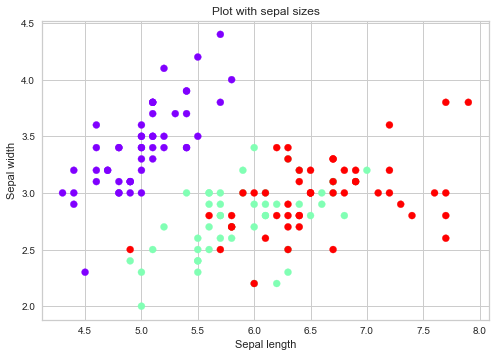

In [11]:
#plt.figure()
plt.scatter(irisData.iloc[:,0], irisData.iloc[:,1],c=species,cmap="rainbow")
#same as: plt.scatter(irisData[sepallength], irisData[sepalwidth],c=species,cmap="rainbow")
plt.title("Plot with sepal sizes")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'petal width')

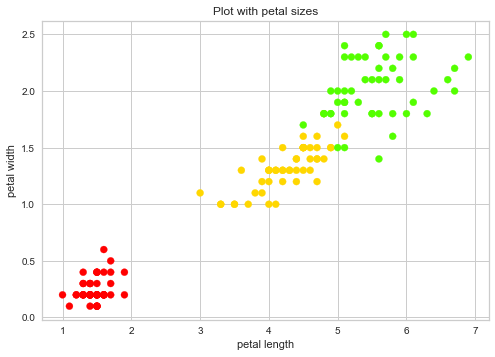

In [12]:
#Further exploration
plt.scatter(irisData.iloc[:,2], irisData.iloc[:,3],c=species,cmap="prism")
plt.title("Plot with petal sizes")
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0, 0.5, 'petal length')

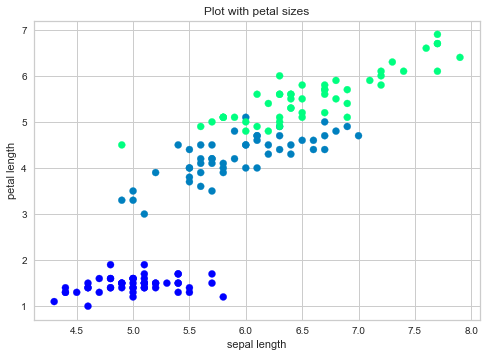

In [13]:
#Further exploration
plt.scatter(irisData.iloc[:,0], irisData.iloc[:,2],c=species,cmap="winter")
plt.title("Plot with petal sizes")
plt.xlabel('sepal length')
plt.ylabel('petal length')

Text(0, 0.5, 'petal width')

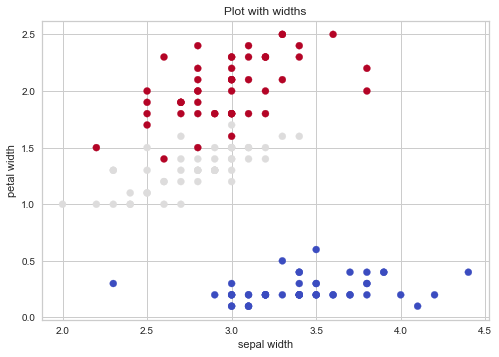

In [14]:
#Further exploration
plt.scatter(irisData.iloc[:,1], irisData.iloc[:,3],c=species,cmap="coolwarm")
plt.title("Plot with widths")
plt.xlabel('sepal width')
plt.ylabel('petal width')

In [15]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Retrieve independent variables(X) and dependent variables(y). Use them to create training and test data

In [16]:
X=irisData.iloc[:,:-1]#all attributes except the last one
y=species

In [17]:
#Split the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train[:2]

,sepallength,sepalwidth,petallength,petalwidth
140,6.7,3.1,5.6,2.4
121,5.6,2.8,4.9,2.0


In [18]:
y_train[:2]

array([2, 2])

# Perform standard scaling- feature engineering

In [19]:
scaler=StandardScaler() #scales data to unit variance
X_train=scaler.fit_transform(X_train) #computes mean and stdev and then uses this to transorm data
X_test=scaler.transform(X_test)

# Build the models and evaluate them. kNN, Decision Tree, and Ramdom Forest selected.

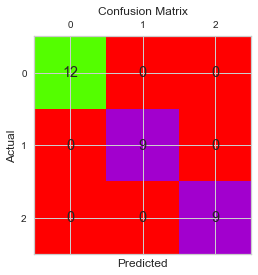

Classification Report:

Precision:1.000
Recall:1.000
f1-score:1.000


In [20]:
#Build a KNN model (k=3)
k3nnClassifier=KNeighborsClassifier(n_neighbors=3)
k3nnClassifier.fit(X_train,y_train)
k3nn_prediction=k3nnClassifier.predict(X_test)
#Metrics
cmatrix=confusion_matrix(y_test,k3nn_prediction)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,k3nn_prediction,output_dict=True)
#print(c_report)
knn_precision=c_report['weighted avg']['precision']
knn_recall=c_report['weighted avg']['recall']
knn_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision:.3f}\nRecall:{knn_recall:.3f}\
\nf1-score:{knn_f1score:.3f}")



|--- petalwidth <= -0.55
|   |--- class: 0
|--- petalwidth >  -0.55
|   |--- petalwidth <= 0.71
|   |   |--- petallength <= 0.65
|   |   |   |--- petalwidth <= 0.58
|   |   |   |   |--- class: 1
|   |   |   |--- petalwidth >  0.58
|   |   |   |   |--- class: 2
|   |   |--- petallength >  0.65
|   |   |   |--- petalwidth <= 0.45
|   |   |   |   |--- class: 2
|   |   |   |--- petalwidth >  0.45
|   |   |   |   |--- sepallength <= 1.32
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepallength >  1.32
|   |   |   |   |   |--- class: 2
|   |--- petalwidth >  0.71
|   |   |--- petallength <= 0.59
|   |   |   |--- sepalwidth <= 0.20
|   |   |   |   |--- class: 2
|   |   |   |--- sepalwidth >  0.20
|   |   |   |   |--- class: 1
|   |   |--- petallength >  0.59
|   |   |   |--- class: 2



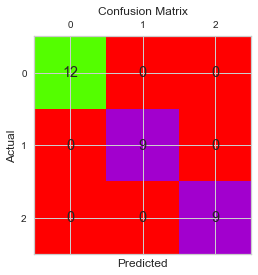

Classification Report:

Precision:1.000
Recall:1.000
f1-score:1.000


In [21]:
#Build a tree model 

#Decision tree classifier
treeClassifier=tree.DecisionTreeClassifier()
treeClassifier.fit(X_train,y_train)#train the model
tree_prediction=treeClassifier.predict(X_test)

# Display the text representation of the tree using export_text function2
features=list(irisData.columns[:-1])
text_representation = tree.export_text(treeClassifier,feature_names=features)
print(text_representation)


#Metrics
tree_cmatrix=confusion_matrix(y_test,tree_prediction)
graph_confusion_matrix(tree_cmatrix)

print("Classification Report:")
tree_c_report=classification_report(y_test,tree_prediction,output_dict=True)
#print(tree_c_report)
tree_precision=tree_c_report['weighted avg']['precision']
tree_recall=tree_c_report['weighted avg']['recall']
tree_f1score=tree_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{tree_precision:.3f}\nRecall:{tree_recall:.3f}\
\nf1-score:{tree_f1score:.3f}")

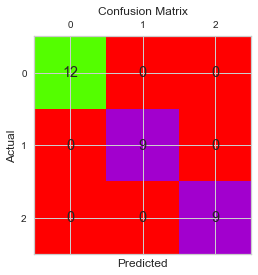

Classification Report:

Precision:1.000
Recall:1.000
f1-score:1.000


In [22]:
#Build Random Forest model
rfClassifier=RandomForestClassifier(n_estimators=33)
rfClassifier.fit(X_train,y_train)
rf_prediction=rfClassifier.predict(X_test)

#Metrics
rf_cmatrix=confusion_matrix(y_test,rf_prediction)
graph_confusion_matrix(rf_cmatrix)

print("Classification Report:")
rf_c_report=classification_report(y_test,rf_prediction,output_dict=True)
#print(rf_c_report)
rf_precision=rf_c_report['weighted avg']['precision']
rf_recall=rf_c_report['weighted avg']['recall']
rf_f1score=rf_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision:.3f}\nRecall:{rf_recall:.3f}\
\nf1-score:{rf_f1score:.3f}")

# Retrieve precision, recall, and F1-score values and graph them.

In [23]:
#Retrieve precision, recall, and f1-score
precisions={"knn":knn_precision, "rf":rf_precision, "tree":tree_precision}
recalls={"knn":knn_recall, "rf":rf_recall, "tree":tree_recall}
f1_scores={"knn":knn_f1score, "rf":rf_f1score, "tree":tree_f1score}

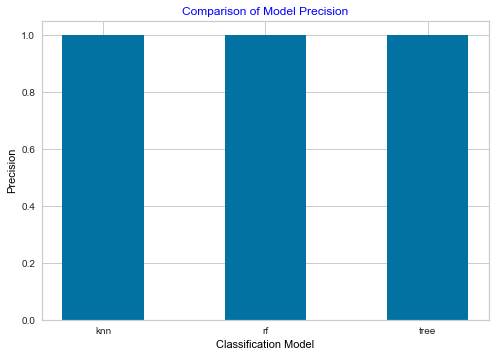

In [24]:
# Plot the graph of precision
models=list(precisions.keys())
modelPrecisions=list(precisions.values())
plt.bar(models, modelPrecisions, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precision", color='blue')
plt.show()

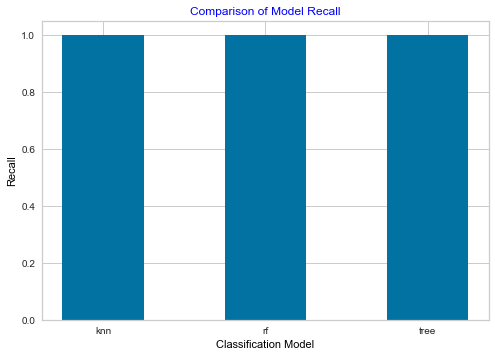

In [25]:
# Plot the graph of recall
models=list(precisions.keys())
modelRecalls=list(recalls.values())
plt.bar(models, modelRecalls, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Recall", color='black')
plt.title("Comparison of Model Recall", color='blue')
plt.show()


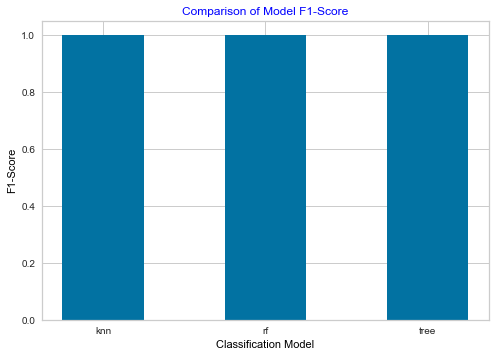

<Figure size 576x396 with 0 Axes>

In [26]:
# Plot the graph of recall
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Comparison of Model F1-Score", color='blue')
plt.show()
plt.tight_layout()

# PCA Decomposition of Iris Dataset

In [27]:
irisPCA=PCA(n_components=3)
iris_reduced=irisPCA.fit_transform(irisData.iloc[:,:-1]) #all attributes except class
iris_reduced[:10]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ]])

In [28]:
iris_reduced.shape

(150, 3)

In [29]:
#Take data back to original state
A=irisPCA.inverse_transform(iris_reduced)
A.shape

(150, 4)

Text(0.5, 0, 'PCA 3')

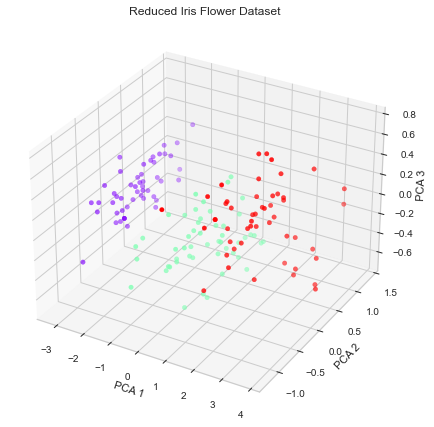

In [30]:
#Create 3D scatter plot
fig=plt.figure()
ax=Axes3D(fig)
ax.set_title('Reduced Iris Flower Dataset')
ax.scatter(iris_reduced[:,0], iris_reduced[:,1], iris_reduced[:,2], c=species,cmap='rainbow')
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

In [31]:
reduced_X=iris_reduced
reduced_X_train,reduced_X_test, reduced_y_train,reduced_y_test=train_test_split(reduced_X,y,test_size=0.2)

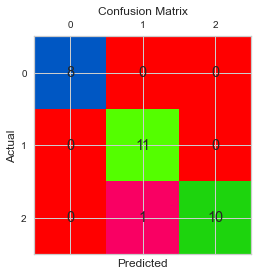

Classification Report:

Precision:0.969
Recall:0.967
f1-score:0.967


In [32]:
#train with decomposed data
#Build a KNN model (k=3)
k3nnClassifier2=KNeighborsClassifier(n_neighbors=3)
k3nnClassifier2.fit(reduced_X_train,reduced_y_train)
k3nn_prediction_PCA=k3nnClassifier2.predict(reduced_X_test)
#Metrics
cmatrix_PCA=confusion_matrix(reduced_y_test,k3nn_prediction_PCA)
graph_confusion_matrix(cmatrix_PCA)

print("Classification Report:")
c_report_PCA=classification_report(reduced_y_test,k3nn_prediction_PCA,output_dict=True)
#print(c_report)
knn_precision_PCA=c_report_PCA['weighted avg']['precision']
knn_recall_PCA=c_report_PCA['weighted avg']['recall']
knn_f1score_PCA=c_report_PCA['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision_PCA:.3f}\nRecall:{knn_recall_PCA:.3f}\
\nf1-score:{knn_f1score_PCA:.3f}")


In [33]:
#Retrieving the encoded classe

In [34]:
speciesEncodedLabels.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
k3nn_prediction_PCA[:10]

array([2, 1, 0, 2, 1, 1, 1, 0, 2, 1])

In [36]:
#Retrieve the categorical value from the encoded data--output in human friendly format

In [37]:
speciesEncodedLabels.inverse_transform(k3nn_prediction_PCA[:10])

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Predict unseen instance and display the result in human friendly format.

In [38]:
#Set up unseen instance



X_unseen=[[5.1,3.5,1.4,0.2],[5,3.3,1.4,0.2],[6.8,3,5.5,2.1],[6.3,2.3,4.4,1.3],[5.6,3,4.1,1.3]]
#Transform the unseen instance using the stanrad scaler since the training set was scaled as well.
X_unseen=scaler.transform(X_unseen)
print(X_unseen)
#Classfiy unseen instance with the decision tree model
y_unseen_by_tree=treeClassifier.predict(X_unseen)
y_unseen_by_tree #output is not human friendly

[[-0.87889953  1.14232286 -1.36932996 -1.33966209]
 [-0.99766974  0.67206988 -1.36932996 -1.33966209]
 [ 1.14019398 -0.03330959  0.96184769  1.17220433]
 [ 0.54634295 -1.679195    0.33640978  0.11457636]
 [-0.2850485  -0.03330959  0.16583581  0.11457636]]


array([0, 0, 2, 1, 1])

In [39]:
#Display prediction(s) in human friendly format.
print("Instance:{}\nPredicted:{}".format(X_unseen[:], speciesEncodedLabels.inverse_transform(y_unseen_by_tree)[:]))

Instance:[[-0.87889953  1.14232286 -1.36932996 -1.33966209]
 [-0.99766974  0.67206988 -1.36932996 -1.33966209]
 [ 1.14019398 -0.03330959  0.96184769  1.17220433]
 [ 0.54634295 -1.679195    0.33640978  0.11457636]
 [-0.2850485  -0.03330959  0.16583581  0.11457636]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [40]:
#Classfiy unseen instance with the kNN model
y_unseen_by_k3nn=k3nnClassifier.predict(X_unseen)
print("Instance:{}\nPredicted:{}".format(X_unseen[:], speciesEncodedLabels.inverse_transform(y_unseen_by_k3nn)[:]))

Instance:[[-0.87889953  1.14232286 -1.36932996 -1.33966209]
 [-0.99766974  0.67206988 -1.36932996 -1.33966209]
 [ 1.14019398 -0.03330959  0.96184769  1.17220433]
 [ 0.54634295 -1.679195    0.33640978  0.11457636]
 [-0.2850485  -0.03330959  0.16583581  0.11457636]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [41]:
#Classfiy unseen instance with the Random Forest model
y_unseen_by_rf=rfClassifier.predict(X_unseen)
print("Instance:{}\nPredicted:{}".format(X_unseen[:], speciesEncodedLabels.inverse_transform(y_unseen_by_rf)[:]))

Instance:[[-0.87889953  1.14232286 -1.36932996 -1.33966209]
 [-0.99766974  0.67206988 -1.36932996 -1.33966209]
 [ 1.14019398 -0.03330959  0.96184769  1.17220433]
 [ 0.54634295 -1.679195    0.33640978  0.11457636]
 [-0.2850485  -0.03330959  0.16583581  0.11457636]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


# Regressions models--Boston dataset

In [42]:
boston=datasets.load_boston()
boston.data.shape

(506, 13)

In [43]:
boston_target=boston.target
boston_target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [44]:
bostonDF=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [45]:
bostonDF['Median Value']=boston_target

In [46]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   CHAS          506 non-null    float64
 4   NOX           506 non-null    float64
 5   RM            506 non-null    float64
 6   AGE           506 non-null    float64
 7   DIS           506 non-null    float64
 8   RAD           506 non-null    float64
 9   TAX           506 non-null    float64
 10  PTRATIO       506 non-null    float64
 11  B             506 non-null    float64
 12  LSTAT         506 non-null    float64
 13  Median Value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [47]:
#Prepare training data for Boston dataset

In [48]:
boston_X=bostonDF.iloc[:,:-1]
boston_X.shape, boston_X.iloc[0,:]

((506, 13),
 CRIM         0.00632
 ZN          18.00000
 INDUS        2.31000
 CHAS         0.00000
 NOX          0.53800
 RM           6.57500
 AGE         65.20000
 DIS          4.09000
 RAD          1.00000
 TAX        296.00000
 PTRATIO     15.30000
 B          396.90000
 LSTAT        4.98000
 Name: 0, dtype: float64)

In [49]:
boston_y=bostonDF.iloc[:,-1]
boston_y.shape, boston_y[0]

((506,), 24.0)

In [50]:
#Set up linear regression model
linearReg=linear_model.LinearRegression()


In [51]:
X_train, X_test,y_train,y_test=train_test_split(boston_X,boston_y,test_size=0.25)

In [52]:
y_train.shape,y_test.shape

((379,), (127,))

In [53]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [54]:
#fit the model
linearReg=linearReg.fit(X_train,y_train)

In [55]:
linearreg_predictions=linearReg.predict(X_test)
print("MSE: ",mean_squared_error(y_test, linearreg_predictions))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, linearreg_predictions)))

MSE:  26.11378334363447
RMSE:  5.110164708072967


In [56]:
#Check performance---using the variance. The close the variance is to 1, the better
variance=linearReg.score(X_test,y_test)
print(variance)

0.6395365331383355


In [57]:
#Set up support vector regression ()
svc=svm.SVR(kernel='linear',C=1000)
svc.fit(X_train,y_train)
linearSVC_predictions=svc.predict(X_test)
print("MSE: ",mean_squared_error(y_test, linearSVC_predictions))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, linearSVC_predictions)))

MSE:  2129.396802253836
RMSE:  46.14538765958994


In [58]:
#Set up support vector regression ()
svc=svm.SVR(kernel='poly',C=1000)
svc.fit(X_train,y_train)
polySVC_predictions=svc.predict(X_test)
print("MSE: ",mean_squared_error(y_test, polySVC_predictions))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, polySVC_predictions)))

MSE:  29.977795094140728
RMSE:  5.4751981785265755


In [59]:
#Set up support vector regression ()
svc=svm.SVR(kernel='rbf',C=1000)
svc.fit(X_train,y_train)
rbfSVC_predictions=svc.predict(X_test)
print("MSE: ",mean_squared_error(y_test, rbfSVC_predictions))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, rbfSVC_predictions)))

MSE:  29.161954544639162
RMSE:  5.400180973322946


# Clustering Models- Iris Dataset with 'class' attribute dropped.

In [60]:
scaler2=StandardScaler()
df_iris_standardized=scaler2.fit_transform(irisData.iloc[:,:-1])
df_iris_standardized=pd.DataFrame(df_iris_standardized, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris_standardized=df_iris_standardized.set_index(irisData.index)

In [61]:
df_iris_standardized.iloc[:2,:]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


<AxesSubplot:xlabel='pc_1', ylabel='pc_2'>

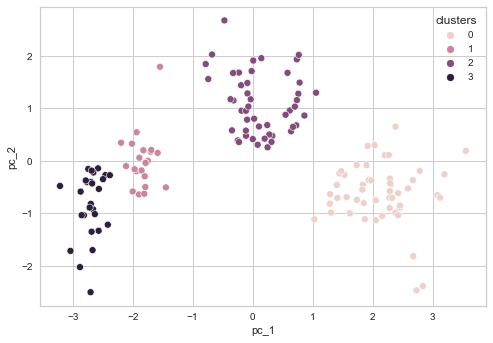

In [62]:
#Perform clustering using k-Means
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_iris_standardized)
df_iris_standardized["clusters"] = cluster_labels

# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
iris_standardized_pca = pca.fit_transform(df_iris_standardized)
iris_standardized_pca = pd.DataFrame(data=iris_standardized_pca, columns=["pc_1", "pc_2"])
iris_standardized_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=iris_standardized_pca)

In [63]:
# Calculate silhouette_score
print(silhouette_score(iris_standardized_pca, kmeans.labels_))

0.6899337051449616


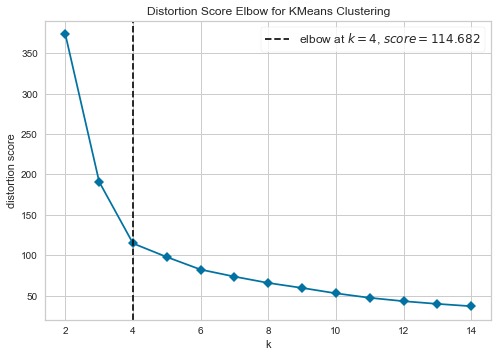

In [64]:
#metric='silhouette'
#metric='calinski_harabasz'
metric='distortion'
plotElbow(df_iris_standardized,metric)

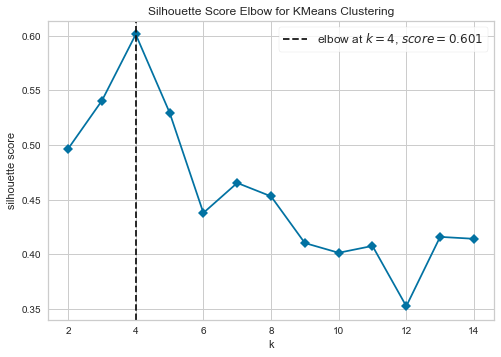

In [65]:
metric='silhouette'
#metric='calinski_harabasz'
#metric='distortion'
plotElbow(df_iris_standardized,metric)

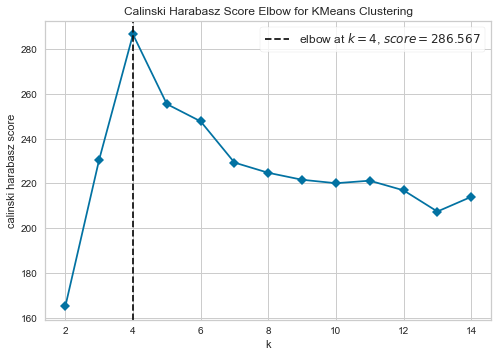

In [66]:
#metric='silhouette'
metric='calinski_harabasz'
#metric='distortion'
plotElbow(df_iris_standardized,metric)

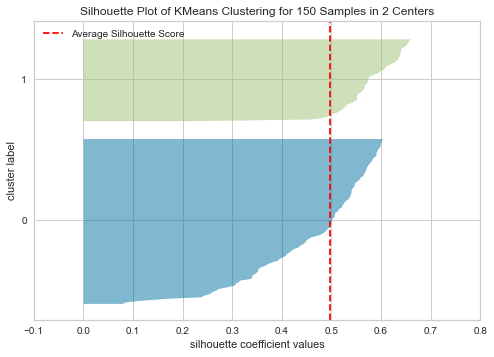

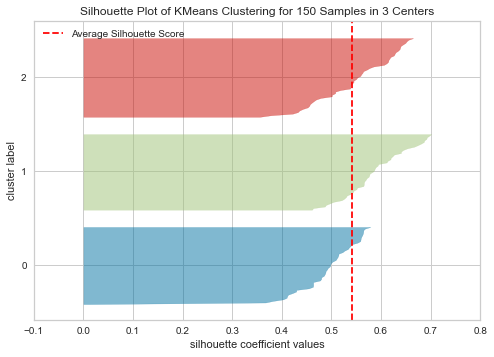

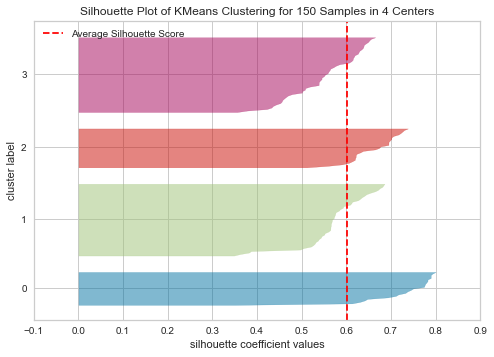

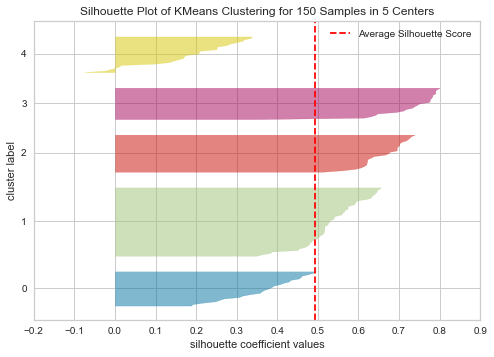

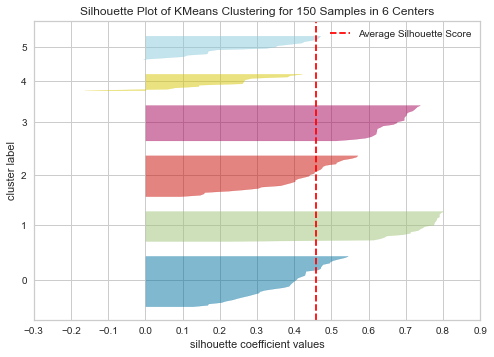

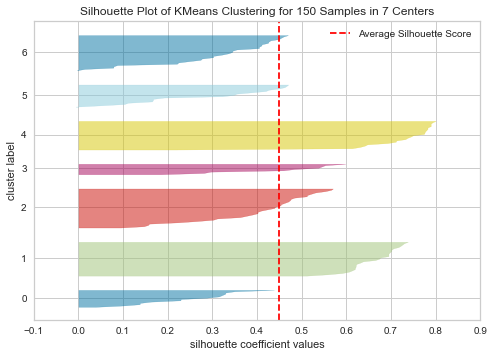

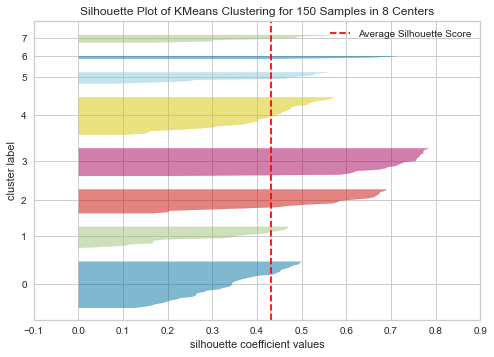

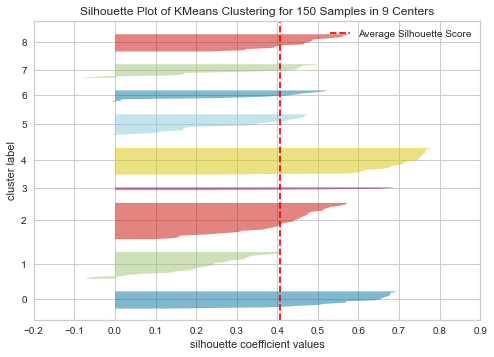

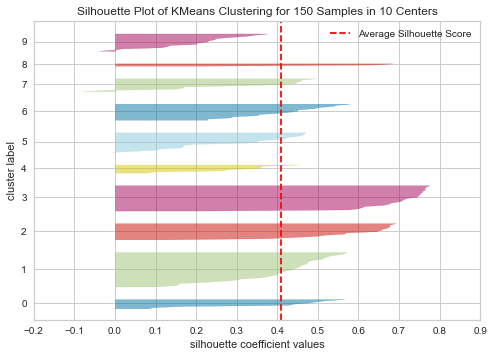

In [67]:
for k in range(2,11):
    plotSilhouette(df_iris_standardized,k)